**HYPOTHESES GENERATION**
The factors which can affect loan approval are:
Salary:Applicants with high income have high chances of loan approval.
Previous history:Applicants who have repayed their previous loans have high chances of loan approval
Loan amount: Less loan amount leads to high chances of loan approval
Loan term:Loan amount for less time and less amount have high chances of approval
EMI: Lesser the amount to be paid monthly high chances of loan approval.


> Add blockquote



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")


In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [6]:
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
train.head()

Train Shape: (614, 13)
Test Shape: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


EDA

Univariate analysis

In [7]:
train['Loan_Status'].value_counts()


,count
Loan_Status,
Y,422
N,192


In [8]:
train['Loan_Status'].value_counts(normalize=True)


,proportion
Loan_Status,
Y,0.687296
N,0.312704


<Axes: xlabel='Loan_Status'>

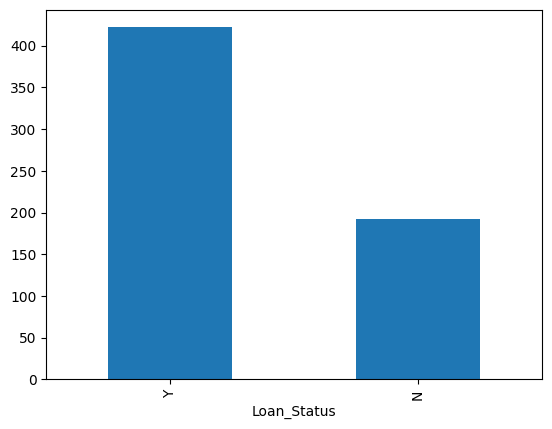

In [9]:
train['Loan_Status'].value_counts().plot.bar()


422(around 69%) people out of 614 got the approval.


Independent Variable (Categorical)

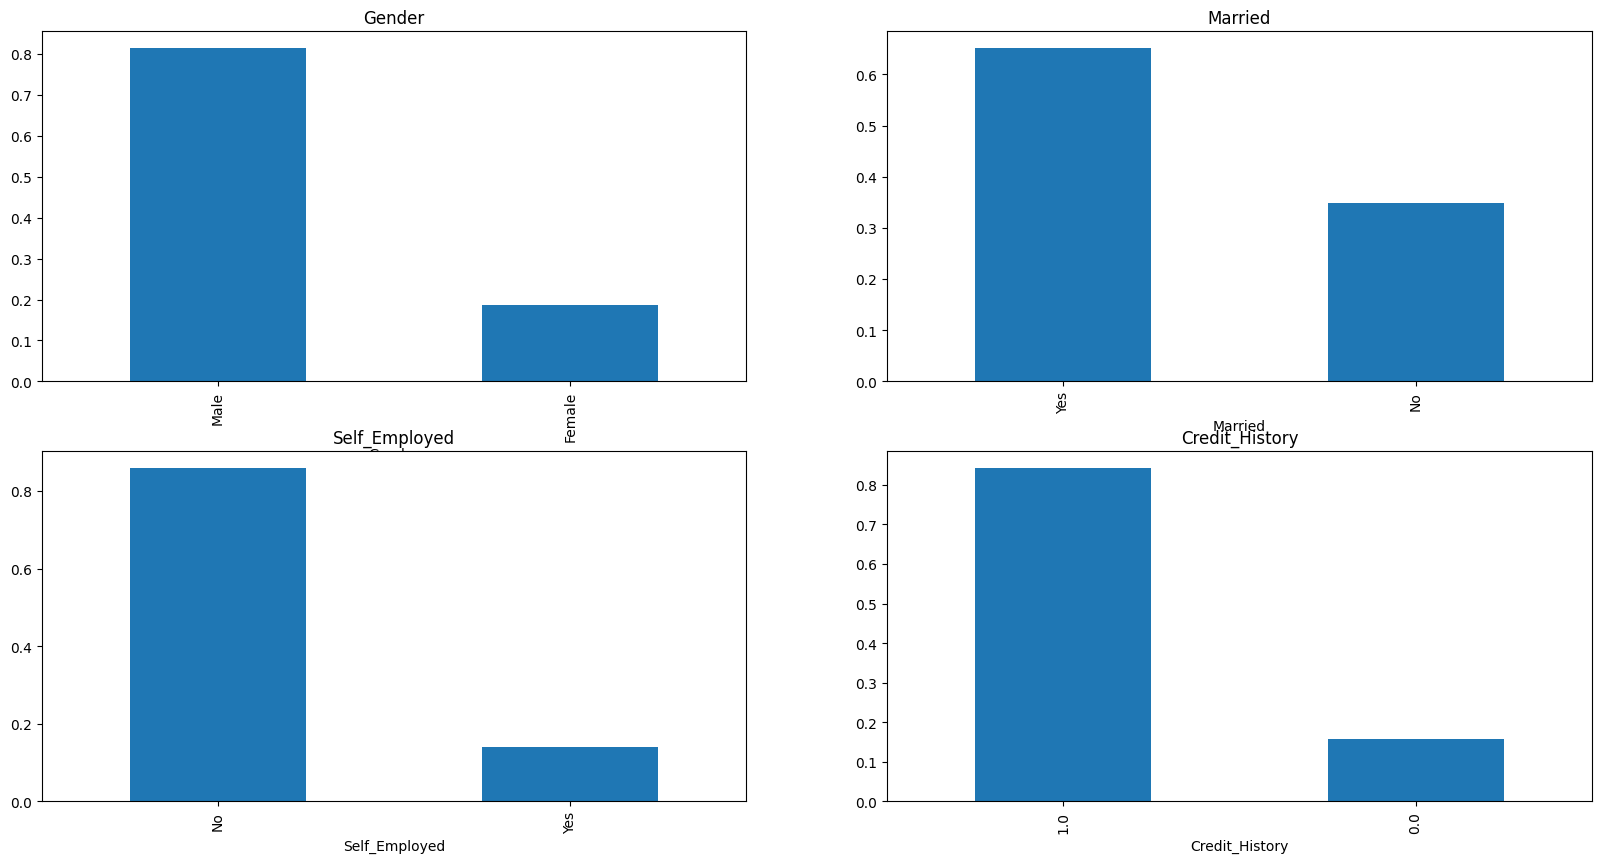

In [10]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

It can be inferred from the above bar plots that:

80% of applicants in the dataset are male.

Around 65% of the applicants in the dataset are married.

About 15% of applicants in the dataset are self-employed.

About 85% of applicants have repaid their debts.

Independent Variable (Ordinal)


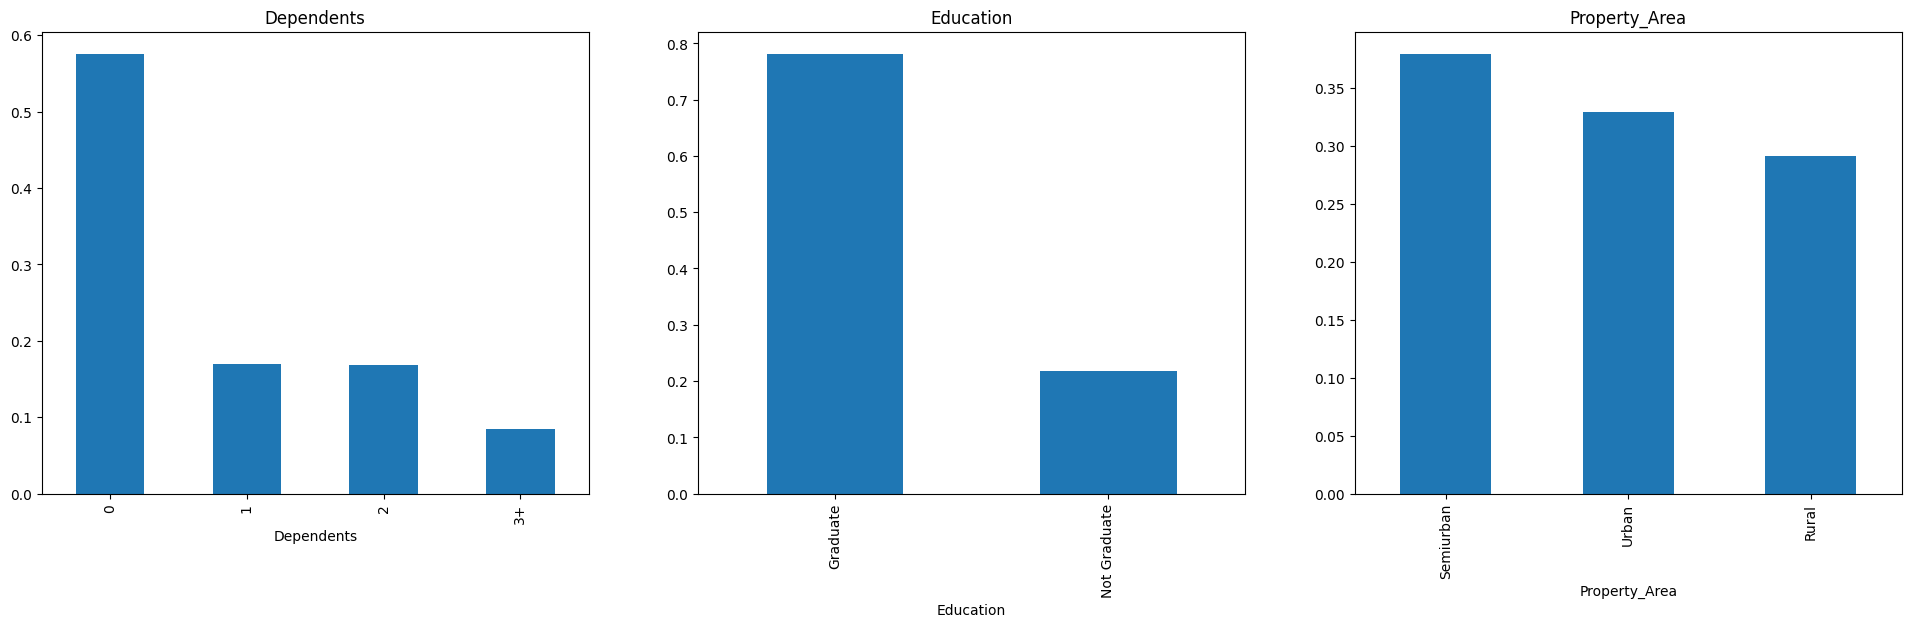

In [11]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()

Following inferences can be made from the above bar plots:

Most of the applicants don’t have dependents.

About 80% of the applicants are graduates.

Most of the applicants are from semi-urban areas.


Independent Variable(Numerical)

/tmp/ipython-input-1968676989.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome']);


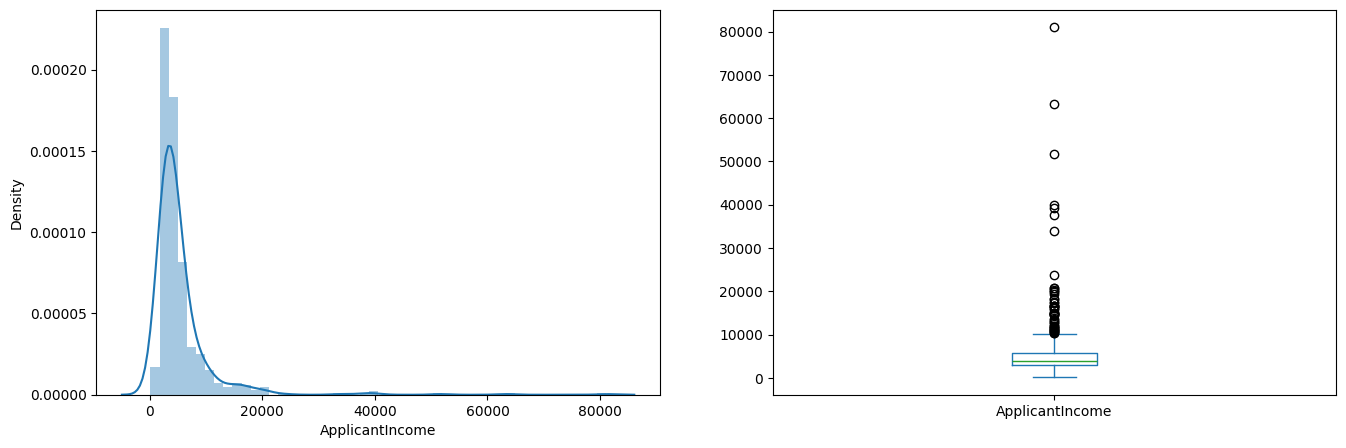

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed.

/tmp/ipython-input-2343458943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount']);


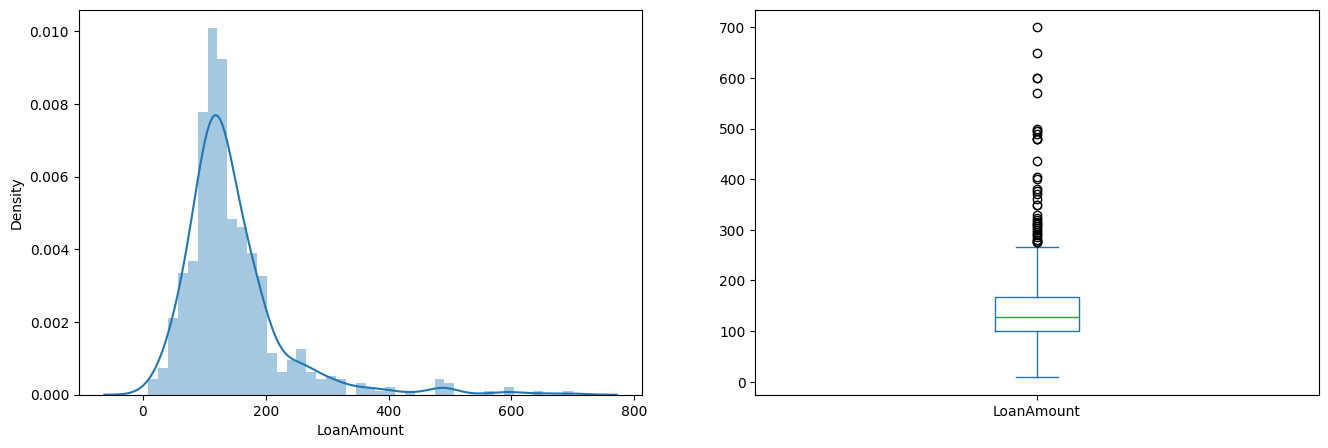

In [13]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()


We see a lot of outliers in this variable and the distribution is fairly normal.

**Bivariate Analysis**

<Axes: xlabel='Gender'>

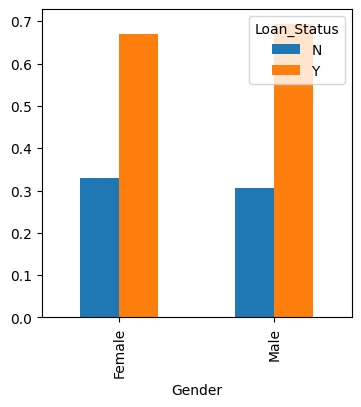

In [14]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))


It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

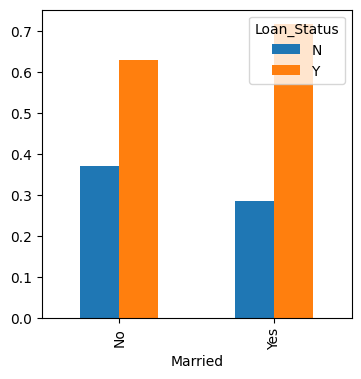

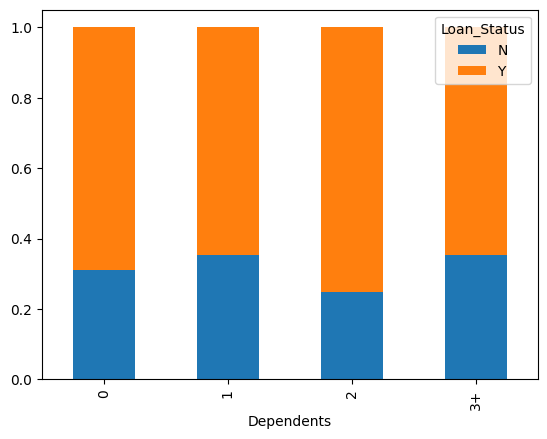

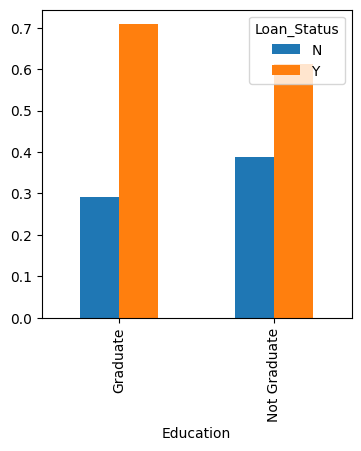

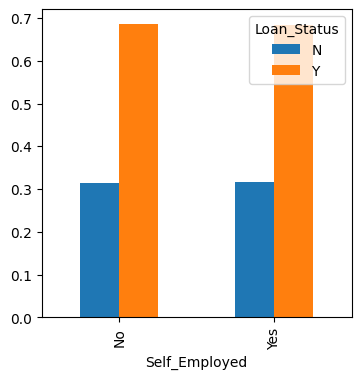

In [15]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()


The proportion of married applicants is higher for the approved loans.

The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

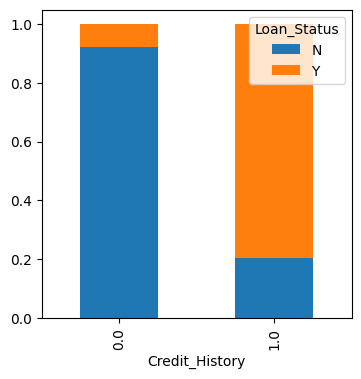

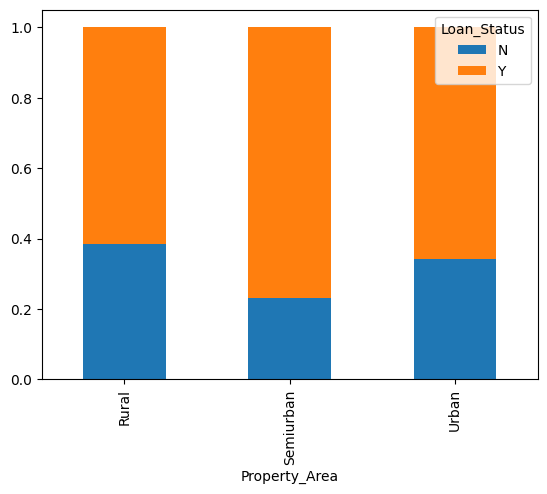

In [16]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()



It seems people with a credit history of 1 are more likely to get their loans approved.

The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.


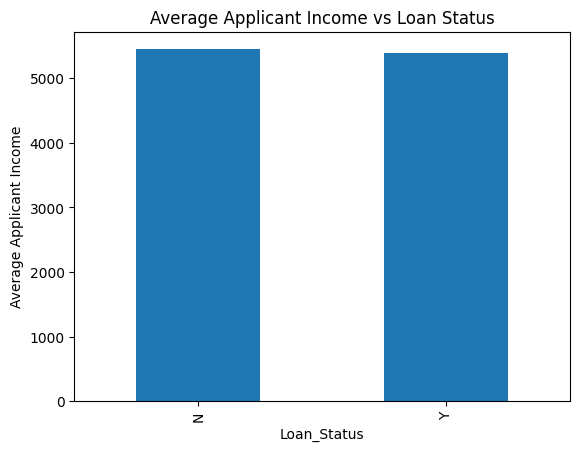

In [17]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

plt.ylabel("Average Applicant Income")
plt.title("Average Applicant Income vs Loan Status")
plt.show()


We don’t see any change in the mean income.

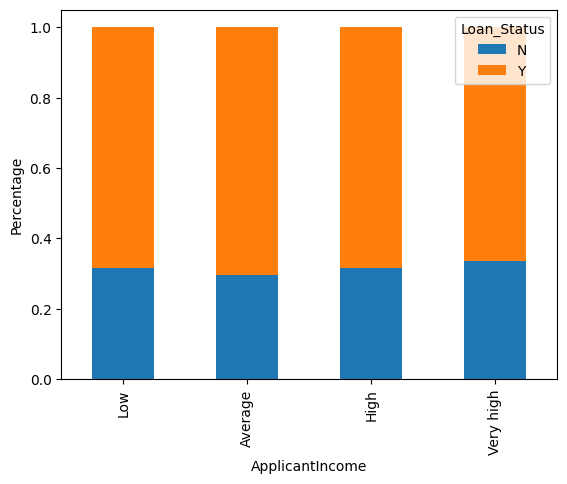

In [18]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that Applicant’s income does not affect the chances of loan approval

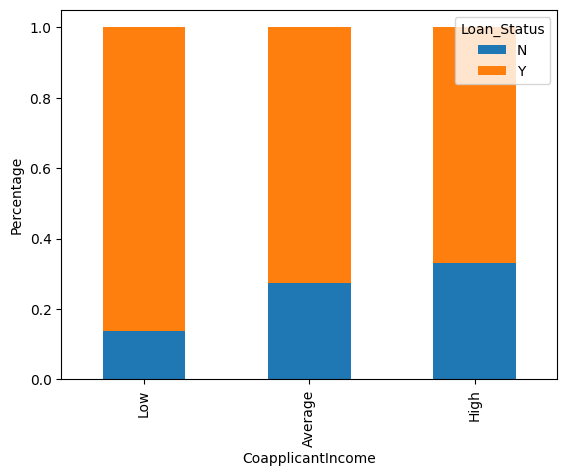

In [19]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')


It shows that if co-applicants income is less the chances of loan approval are high.

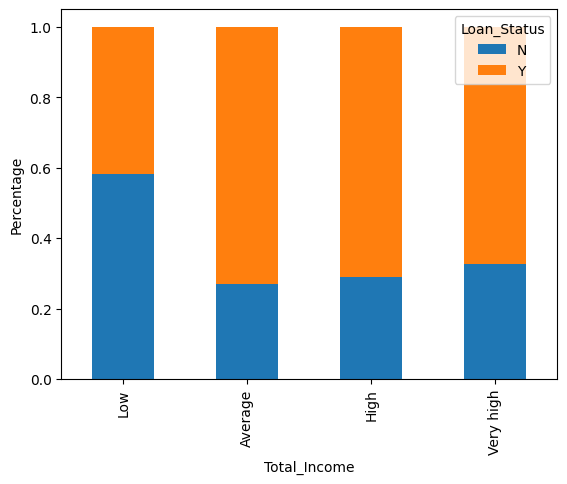

In [20]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')


We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High, and Very High Income.

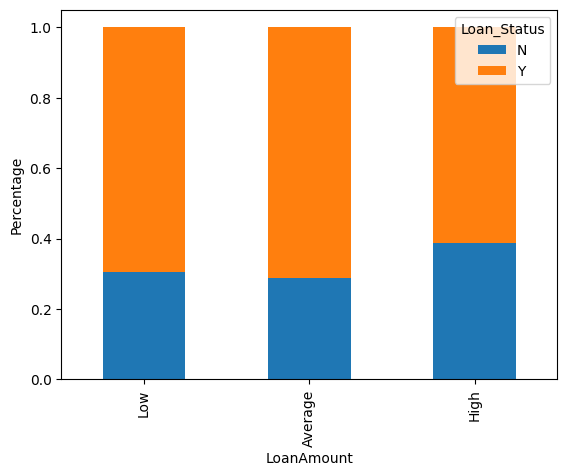

In [21]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')



It can be seen that the proportion of approved loans is higher for Low and Average Loan Amounts as compared to that of High Loan Amounts which supports our hypothesis which considered that the chances of loan approval will be high when the loan amount is less.

**Preprocessing**

In [22]:
for col in ['Gender', 'Married', 'Self_Employed', 'Dependents']:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(test[col].mode()[0])


In [23]:
for col in ['LoanAmount', 'Loan_Amount_Term']:
    train[col].fillna(train[col].median(), inplace=True)
    test[col].fillna(test[col].median(), inplace=True)

/tmp/ipython-input-103735065.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
/tmp/ipython-input-103735065.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [24]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)


/tmp/ipython-input-1359746575.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
/tmp/ipython-input-1359746575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

Feature Engineering

In [25]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [26]:
train['LoanToIncome'] = train['LoanAmount'] / train['TotalIncome']
test['LoanToIncome'] = test['LoanAmount'] / test['TotalIncome']

In [27]:
for col in ['LoanAmount', 'TotalIncome']:
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])

Encoding Categorical Variables

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
le = LabelEncoder()

In [30]:
for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

Train-Test split

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X = train.drop(['Loan_ID','Loan_Status'], axis=1)
y = train['Loan_Status'].map({'Y':1, 'N':0})  # Convert Y/N → 1/0

In [33]:
print(X.isnull().sum())
print(y.isnull().sum())

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
TotalIncome                 0
LoanToIncome                0
dtype: int64
0


In [34]:
# Categorical features
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for df in [train, test]:
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

In [35]:
num_cols = ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']
for df in [train, test]:
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())


In [36]:
X = train.drop(columns=['Loan_ID', 'Loan_Status'])
y = train['Loan_Status']


In [37]:
from sklearn.model_selection import train_test_split


In [38]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Model Building

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Logistic Regression

In [41]:
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

# Make sure columns align
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)


In [42]:
log = LogisticRegression(max_iter=500, random_state=42)
log.fit(X_train, y_train)
print("Logistic Accuracy:", accuracy_score(y_val, log.predict(X_val)))

Logistic Accuracy: 0.8617886178861789


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stratified K-fold

In [43]:
# Features and target
X = train.drop(columns=['Loan_ID', 'Loan_Status'])
y = train['Loan_Status']

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)



In [44]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [45]:
# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression with grid search
log_reg = LogisticRegression(max_iter=1000)

# Define hyperparameter grid
param_grid = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 5, 10]   # Regularization strength
}

# GridSearchCV with Stratified K-Fold
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Accuracy: 0.8062241769958683


Decision Tree

In [46]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_val, dt.predict(X_val)))

Decision Tree Accuracy: 0.8373983739837398


Random Forest

In [47]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_val, rf.predict(X_val)))

Random Forest Accuracy: 0.8861788617886179


LightGBM Models

In [48]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [49]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [50]:
from sklearn.preprocessing import LabelEncoder

# Encode all object columns
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        X_val[col] = le.transform(X_val[col].astype(str))

In [51]:
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

# Align columns so both sets match
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

In [52]:
X_train = X_train.apply(pd.to_numeric, errors='ignore')
X_val = X_val.apply(pd.to_numeric, errors='ignore')


/tmp/ipython-input-849838021.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_train = X_train.apply(pd.to_numeric, errors='ignore')
/tmp/ipython-input-849838021.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_val = X_val.apply(pd.to_numeric, errors='ignore')


In [54]:
y_train = y_train.replace({'Y': 1, 'N': 0})
y_val   = y_val.replace({'Y': 1, 'N': 0})


/tmp/ipython-input-190296304.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'Y': 1, 'N': 0})
/tmp/ipython-input-190296304.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_val   = y_val.replace({'Y': 1, 'N': 0})


In [55]:
xgb.fit(X_train, y_train)
print("XGB Accuracy:", accuracy_score(y_val, xgb.predict(X_val)))


XGB Accuracy: 0.8455284552845529


LightGBM

In [56]:
lgb = LGBMClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [57]:
lgb.fit(X_train, y_train)
print("LightGBM Accuracy:", accuracy_score(y_val, lgb.predict(X_val)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 337, number of negative: 154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.686354 -> initscore=0.783130
[LightGBM] [Info] Start training from score 0.783130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Ensemble

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [59]:
log_clf = LogisticRegression(max_iter=500, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

ensemble = VotingClassifier(
    estimators=[('log', log_clf), ('rf', rf_clf), ('xgb', xgb)],
    voting='soft'
)

In [60]:
ensemble.fit(X_train, y_train)
print("Ensemble Accuracy:", accuracy_score(y_val, ensemble.predict(X_val)))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Accuracy: 0.8780487804878049


Threshold Tuning

In [61]:
y_prob = ensemble.predict_proba(X_val)[:,1]
best_thresh, best_acc = 0.5, 0

In [62]:
for thresh in np.arange(0.3, 0.7, 0.01):
    preds = (y_prob >= thresh).astype(int)
    acc = accuracy_score(y_val, preds)
    if acc > best_acc:
        best_acc, best_thresh = acc, thresh

print("Best Threshold:", best_thresh, "Accuracy:", best_acc)


Best Threshold: 0.48000000000000015 Accuracy: 0.8780487804878049


In [67]:
log = LogisticRegression(max_iter=2000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create ensemble
ensemble = VotingClassifier(
    estimators=[
        ('log', log),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='soft'
)

# Train final model on full dataset
final_model = ensemble
final_model.fit(X, y)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:43:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('log',
                              LogisticRegression(max_iter=2000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Example: numeric + categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

final_model = Pipeline([
    ('preprocessing', preprocessor),
    ('voting', ensemble)
])



In [73]:
# Create missing features in test_data (example)
test_data['Total_Income'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']

# If you did any one-hot encoding or binning:
test_data_encoded = pd.get_dummies(test_data)
test_data_encoded = test_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Now predict probabilities
y_prob_test = final_model.predict_proba(test_data_encoded)[:, 1]


In [74]:
submission = pd.DataFrame({
    'Loan_ID': test['Loan_ID'],
    'Loan_Status': np.where(pred==1, 'Y', 'N')
})

submission.to_csv("submission_advanced.csv", index=False)
print("✅ Advanced submission file created!")

NameError: name 'pred' is not defined